In [114]:
import pandas as pd
from utils import generate_random_sales

dates = pd.date_range(start='2025-01-01', end='2025-12-01', freq='MS')

sales_a = generate_random_sales(50, 100, 12)
sales_b = generate_random_sales(30, 80, 12)
sales_c = generate_random_sales(20, 60, 12)

sales_d = generate_random_sales(10, 50, 12)

df = pd.DataFrame({
    'Date': dates,
    'Product_A': sales_a,
    'Product_B': sales_b,
    'Product_C': sales_c,
    'Product_D': sales_d
})

df.to_csv('data/initial.csv', index=False)


In [115]:
month_names = dates.month_name()

df_M=pd.DataFrame({
    'Month': month_names,
    'Product_A': sales_a,
    'Product_B': sales_b,
    'Product_C': sales_c,
    'Product_D': sales_d
})

df_M['Total_Sales'] = df_M[['Product_A', 'Product_B', 'Product_C', 'Product_D']].sum(axis=1)
df_M['Average_sales'] = df_M[['Product_A', 'Product_B', 'Product_C', 'Product_D']].mean(axis=1)
df_M['mom_growth'] = total_sales.pct_change() * 100

#2
def assign_quarter(month_num):
    if month_num in [1, 2, 3]:
        return 'Q1'
    elif month_num in [4, 5, 6]:
        return 'Q2'
    elif month_num in [7, 8, 9]:
        return 'Q3'
    else:
        return 'Q4'

df_M['Quarter'] = df_M['Month'].apply(lambda m: assign_quarter(pd.to_datetime(m + ' 2025').month))

df_M['Max_Sales_Product'] = df_M[['Product_A','Product_B','Product_C','Product_D']].idxmax(axis=1)
df_M['Min_Sales_Product'] = df_M[['Product_A','Product_B','Product_C','Product_D']].idxmin(axis=1)

df_M.to_csv('data/final.csv', index=False)

print("-"*102)
print(f"|{'Month':<10}| {'Total Sales':<12}| {'Average Sales':<14}| {'MoM Growth (%)':<15}| {'Quarter':<8}| {'Max Product':<15}| {'Min Product':<15}|")
print("-"*102)

for i in range(len(df_M)):
    m = df_M['Month'][i]
    total = df_M['Total_Sales'][i]
    avg = df_M['Average_sales'][i]
    growth = df_M['mom_growth'][i]
    quarter = df_M['Quarter'][i]
    max_prod = df_M['Max_Sales_Product'][i]
    min_prod = df_M['Min_Sales_Product'][i]
    
    print(f"|{m:<10}| {total:<12}| {avg:<14.2f}| {growth:<+15.2f}| {quarter:<8}| {max_prod:<15}| {min_prod:<15}|")
print("-"*102)




------------------------------------------------------------------------------------------------------
|Month     | Total Sales | Average Sales | MoM Growth (%) | Quarter | Max Product    | Min Product    |
------------------------------------------------------------------------------------------------------
|January   | 226         | 56.50         | +nan           | Q1      | Product_A      | Product_B      |
|February  | 203         | 50.75         | -23.87         | Q1      | Product_A      | Product_C      |
|March     | 153         | 38.25         | -12.43         | Q1      | Product_A      | Product_D      |
|April     | 157         | 39.25         | +38.27         | Q2      | Product_B      | Product_D      |
|May       | 195         | 48.75         | -8.48          | Q2      | Product_A      | Product_C      |
|June      | 162         | 40.50         | -11.22         | Q2      | Product_A      | Product_D      |
|July      | 225         | 56.25         | +25.27         | Q3    

In [116]:
# Average sales per quarter
pivot_avg = df_M.pivot_table(
    index='Quarter',
    values=['Product_A','Product_B','Product_C','Product_D','Total_Sales'],
    aggfunc='mean'
).round(2)

# total sales per quarter
pivot_total = df_M.pivot_table(
    index='Quarter',
    values=['Product_A','Product_B','Product_C','Product_D','Total_Sales'],
    aggfunc='sum'
)

with open('data/output.csv', 'w') as f:
    f.write("Average Sales per Quarter\n")
    pivot_avg.to_csv(f)
    f.write("\nTotal Sales per Quarter\n")
    pivot_total.to_csv(f)


In [117]:
best_month_row = df_M.loc[df_M['Total_Sales'].idxmax()]
best_month = best_month_row['Month']
best_month_sales = best_month_row['Total_Sales']

print(f"Best Month: {best_month} with {best_month_sales} total sales")

total_per_product = df_M[['Product_A', 'Product_B', 'Product_C', 'Product_D']].sum()
best_product = total_per_product.idxmax()
best_product_sales = total_per_product.max()

print(f"Best Product: {best_product} with {best_product_sales} total sales for the year")

best_quarter = pivot_total['Total_Sales'].idxmax()
best_quarter_sales = pivot_total['Total_Sales'].max()

print(f"Best Quarter: {best_quarter} with {best_quarter_sales} total sales")


Best Month: January with 226 total sales
Best Product: Product_A with 837 total sales for the year
Best Quarter: Q1 with 582 total sales


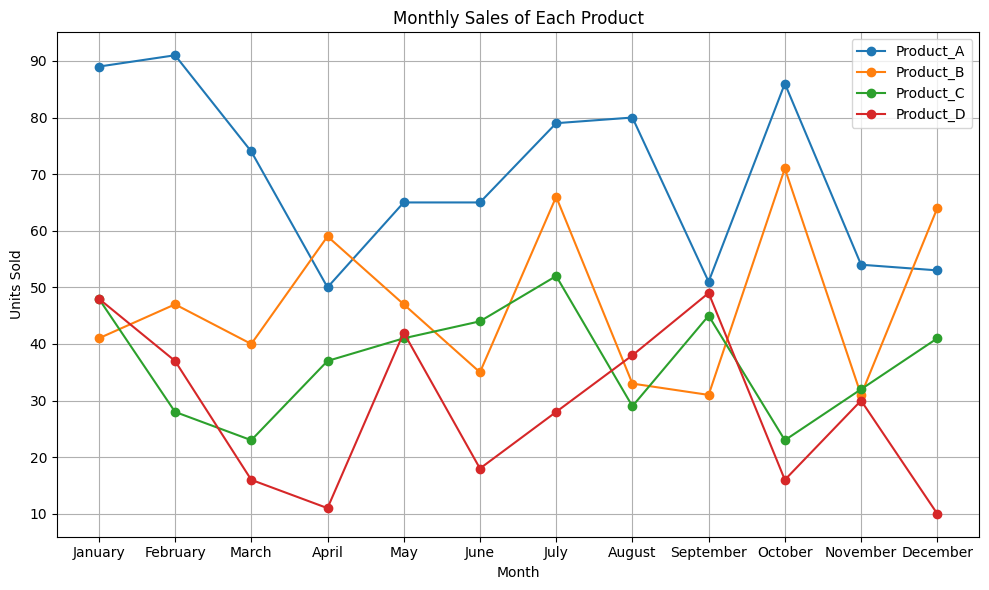

In [118]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df_M['Month'], df_M['Product_A'], marker='o', label='Product_A')
plt.plot(df_M['Month'], df_M['Product_B'], marker='o', label='Product_B')
plt.plot(df_M['Month'], df_M['Product_C'], marker='o', label='Product_C')
plt.plot(df_M['Month'], df_M['Product_D'], marker='o', label='Product_D')

plt.title("Monthly Sales of Each Product")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


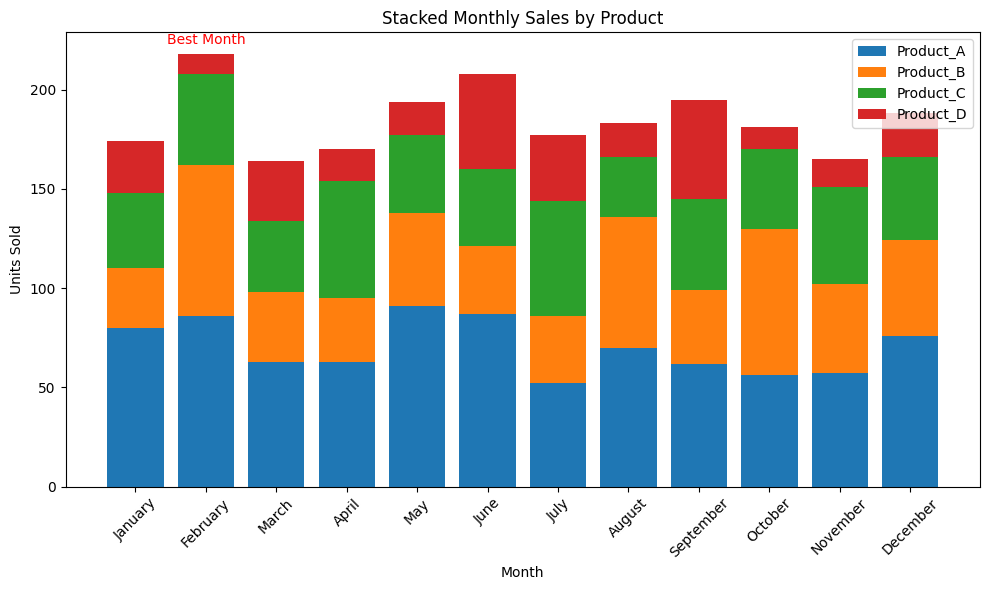

In [94]:
import numpy as np

plt.figure(figsize=(10,6))

months = df_M['Month']
products = ['Product_A','Product_B','Product_C','Product_D']
bottom = np.zeros(len(df_M))  # to stack bars

for prod in products:
    plt.bar(months, df_M[prod], bottom=bottom, label=prod)
    bottom += df_M[prod]

# Annotate best month
best_month_idx = df_M['Total_Sales'].idxmax()
plt.text(best_month_idx, df_M['Total_Sales'][best_month_idx]+5, 'Best Month', ha='center', color='red')

plt.title("Stacked Monthly Sales by Product")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


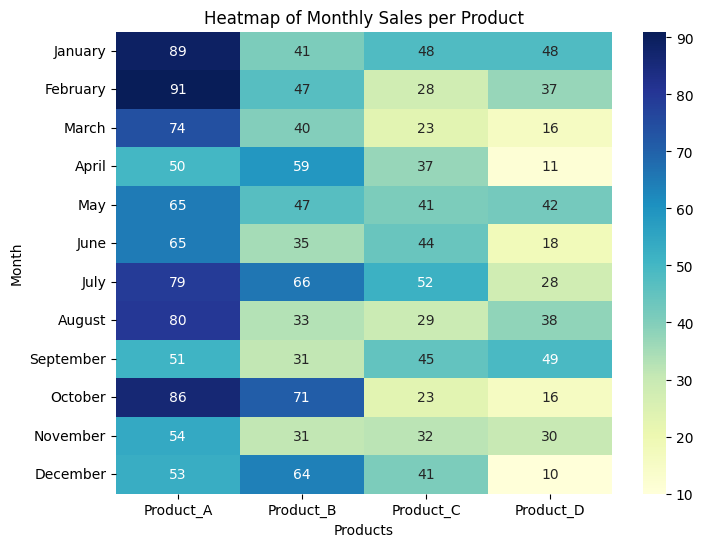

In [119]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df_M[products], annot=True, fmt='d', cmap='YlGnBu', yticklabels=df_M['Month'])
plt.title("Heatmap of Monthly Sales per Product")
plt.xlabel("Products")
plt.ylabel("Month")
plt.show()


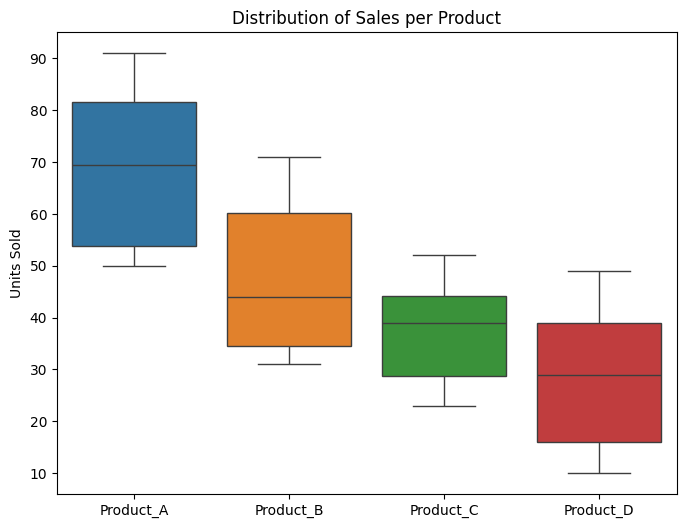

In [120]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_M[products])
plt.title("Distribution of Sales per Product")
plt.ylabel("Units Sold")
plt.show()
